# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

## Learning Objectives

At the end of the experiment, you will be able to
*   understand Tensors and their application
*   define/form Tensors
*   perform different operations of Tensor using PyTorch library
*   understand & implement Back-Propagation in PyTorch in low level






## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "aiml_pg_25" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "4521452411" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "U3W12_Demo_Tensor_Basics" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/diabetes.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():

    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts() and getComments():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()

else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


## Importing required library

In [ ]:
import torch
import numpy as np
import pandas as pd
from torch.autograd import Variable

## Introduction

**Tensors** : Tensor, in relation to machine learning, is a generalization of scalars, vectors and, matrices. See the Table below:

![alt text](https://cdn.extras.talentsprint.com/aiml/Experiment_related_data/Images/Intro_tensor.png)




* From the above explanation, you might have understood that Tensor operations are nothing but matrix operations.

**PyTorch** :
We are introducing PyTorch here, a widely used library for Machine Learning, specifically deep learning. PyTorch is an open source machine learning framework based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Meta AI. It is free and open-source software.
* In the following sections, we will see few commonly used operations of Tensor using PyTorch Library.

### Creation of 1D Tensor

In [ ]:
a=torch.FloatTensor([0, 1, 2, 3])
print(a)


tensor([0., 1., 2., 3.])


In [ ]:
a=torch.IntTensor([0, 1, 2, 3])
print(a)

tensor([0, 1, 2, 3], dtype=torch.int32)


In [ ]:
# Another way: Again, it returns a torch.FloatTensor and data type is float.
b = torch.Tensor([2, 3])
print(b.dtype)
print(b)

torch.float32
tensor([2., 3.])


In [ ]:
# Another way:It infers the dtype automatically.
x = torch.tensor([1., 2., 4, 5, 6])
print(x.dtype)
print(x)

torch.float32
tensor([1., 2., 4., 5., 6.])


In above two ways of defining tensor, notice the capital 'T' and small 't' while writing tensor after torch.Both are different.

### Types of Tensors, dimesion, size

In [ ]:
# Using above defined tensor 'a'.
print(a.type())
print(type(a))
print(a.dtype)
print(a.size())
print(a.ndimension())

torch.IntTensor
<class 'torch.Tensor'>
torch.int32
torch.Size([4])
1


### Creating a scalar tensor

In [ ]:
c = torch.tensor(20)
print(c)
print(c.size())

tensor(20)
torch.Size([])


### Converting scalar to python number

In [ ]:
print(c.item())
print(type(c.item()))

20
<class 'int'>


### Changing from 1D to 2D

In [ ]:
a=torch.tensor([0, 1, 2, 3])
print(a)
a_col=a.view(4,1) # view method can be used to change(shape) 1D into 2D
a_col

tensor([0, 1, 2, 3])


tensor([[0],
        [1],
        [2],
        [3]])

In [ ]:
a_col=a.view(-1, 1)# If we dont know the size of initial array
a_col

tensor([[0],
        [1],
        [2],
        [3]])

In [ ]:
# Checking the dimension of result array
a_col.ndimension()

2

In [ ]:
a=torch.tensor([0, 1, 2, 3])
print(a)
a_col=a.view(-1,4) # view method can be used to change(shape) 1D into 2D
a_col

tensor([0, 1, 2, 3])


tensor([[0, 1, 2, 3]])

### Defining tensor with user defined data type

In [ ]:
an=torch.tensor([0.0, 1.0, 2.0, 3.0, 4.0],dtype=torch.int32)
print(an)
an.dtype

tensor([0, 1, 2, 3, 4], dtype=torch.int32)


torch.int32

### Value Assigenment to any position of tensor

In [ ]:
T1= torch.tensor([1, 2, 3, 4, 5, 6, 7])
print(T1)
T1[0]=100 # Assiging value 100 to zeroth positional element
print(T1)

tensor([1, 2, 3, 4, 5, 6, 7])
tensor([100,   2,   3,   4,   5,   6,   7])


In [ ]:
T1[1:3]=torch.tensor([10, 20]) # Assigning 10 and 20 respectively in first and 2nd positional elements
T1

tensor([100,  10,  20,   4,   5,   6,   7])

### Just like numpy, creating a tensor by copying another tensor results, pointing to same memory location

In [ ]:
a = torch.tensor([2.0, 3])
b = a
b[0] = 11 # Value Assigenment to any position of tensor
print(a)
print(b)

tensor([11.,  3.])
tensor([11.,  3.])


### Type casting

In [ ]:
# Using above defined tensor 'a_col'
print(a_col)
a_col=a_col.type(torch.FloatTensor)   # type casting
print(a_col)

tensor([[0, 1, 2, 3]])
tensor([[0., 1., 2., 3.]])


### Slicing of 1D Tensor

In [ ]:
T1= torch.tensor([1, 2, 3, 4, 5, 6, 7]) # Note zeroth position element is 1 and first position element is 2 and so on.. like List/NumPy array.
print(T1)

tensor([1, 2, 3, 4, 5, 6, 7])


In [ ]:
# Few slicing examples are given below: Same as slicing list or 1D numpy array.
print(T1[1]) # Getting fist positional element
print(T1[1].item()) # getting number out of a tensor
print(T1[:3]) # All element from the beginning till 3rd positional element but, 3rd positional element not included
print(T1[2:]) # All elements starting from 2nd positional till last
print(T1[4:7]) # All elements beginning from 4th positional element  till 7th positional element but, 7th positional element not included

tensor(2)
2
tensor([1, 2, 3])
tensor([3, 4, 5, 6, 7])
tensor([5, 6, 7])


### Torch Tensor to NumPy Array

In [ ]:
# Converting T1 tensor (as defined below) into NumPy array:
T1= torch.tensor([1, 2, 3, 4, 5, 6, 7])
print(T1)
N1=T1.numpy()
print(N1)
type(N1)

tensor([1, 2, 3, 4, 5, 6, 7])
[1 2 3 4 5 6 7]


numpy.ndarray

### NumPy Array to Torch Tensor

In [ ]:
# Converting NumPy array (as defined below) into Tensor array:
n_array=np.array([1, 2, 3, 4, 6, 7])
print(n_array)
torch_tensor=torch.from_numpy(n_array)
torch_tensor

[1 2 3 4 6 7]


tensor([1, 2, 3, 4, 6, 7])

### List from Torch Tensor

In [ ]:
# Converting T1 tensor (as defined below) into NumPy array:
T1= torch.tensor([1, 2, 3, 4, 5, 6, 7])
print(T1)
List1=T1.tolist()
List1

tensor([1, 2, 3, 4, 5, 6, 7])


[1, 2, 3, 4, 5, 6, 7]

### Few mathematical operations
##### Addition : shape of both tensor should match

In [ ]:
b=torch.tensor([1., 2., 3., 4.])
c=torch.tensor([1., 2., 3., 4.])
z=b+c
z

tensor([2., 4., 6., 8.])

##### Vector multiplication with a scalar

In [ ]:
c=torch.tensor([1., 2., 3., 4.])
k=10
r=k*c
r

tensor([10., 20., 30., 40.])

##### Hadamard Product: Elementwise Multiplication

In [ ]:
b=torch.tensor([1., 2., 3., 4.])
c=torch.tensor([1., 2., 3., 4.])
z1=b*c
z1

tensor([ 1.,  4.,  9., 16.])

##### Dot Product of two vectors
- Summation after elementwise mulitpication or Matrix mulipication of vecter b and c.

In [ ]:
b=torch.tensor([1., 2., 3., 4.])
c=torch.tensor([1., 2., 3., 4.])
torch.dot(b,c)

tensor(30.)

In [ ]:
b

tensor([1., 2., 3., 4.])

In [ ]:
b.T   # Transpose of 1D Tensor is not available. Tensor remain same.

<ipython-input-31-0e0d8255438d>:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  b.T   # Transpose of 1D Tensor is not available. Tensor remain same.


tensor([1., 2., 3., 4.])

### Universal functions : Element-Wise Array Operation

Generating equal spaced data points

In [ ]:
# Creating a tensor having 7 equal spaced data points from -3 to 3 including both
b = torch.linspace(-3, 3, 7)
print(b)
print(b.mean())
print(b.max())

tensor([-3., -2., -1.,  0.,  1.,  2.,  3.])
tensor(0.)
tensor(3.)


Note : In all three operations given below, we are able to operate on each element of array in one shot. This is fast and called universal function, which  is element-wise opeation.

In [ ]:
b = torch.linspace(-3, 3, 7) # Creating 1D tensor
print(b)
print(torch.exp(b))  # Calculates exponential of each element and array of same shape as original is obtained.
z=torch.pow(b, 2)     # Calcualtes square of each element and array of same shape as original is obtained.
print(z)
print(torch.sqrt(z)) # Calcualtes square root

tensor([-3., -2., -1.,  0.,  1.,  2.,  3.])
tensor([ 0.0498,  0.1353,  0.3679,  1.0000,  2.7183,  7.3891, 20.0855])
tensor([9., 4., 1., 0., 1., 4., 9.])
tensor([3., 2., 1., 0., 1., 2., 3.])


##### Another example of universal function : torch.sin () & visualization of sin function :





In [ ]:
# Creating a tensor having 100 equal spaced data points from 0 to 2pi including both
x=torch.linspace(0, 2*np.pi, 100)
y=torch.sin(x)

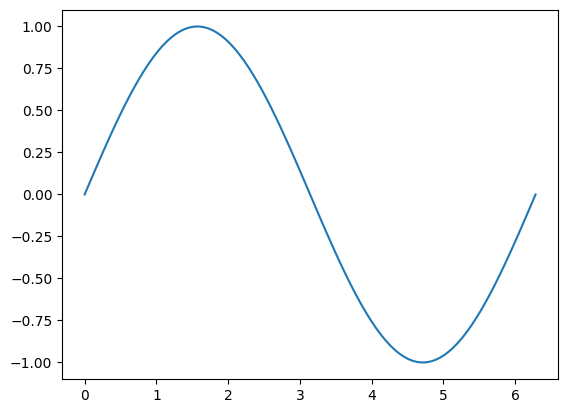

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x.numpy(), y.numpy())
plt.show()

## Intro to 2D tensor
The methods and types for 2D tensors is similar to the methods and types for 1D tensors which has been introduced till now.Let us see how to convert a 2D list to a 2D tensor.


In [ ]:
# Convert 2D List to 2D Tensor

twoD_list = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]
twoD_tensor = torch.tensor(twoD_list)
# Or Direcltly: twoD_tensor = torch.tensor( [[11, 12, 13], [21, 22, 23], [31, 32, 33]] )
print("The New 2D Tensor:\n", twoD_tensor)

The New 2D Tensor:
 tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])


In [ ]:
# Try tensor_obj.ndimension(), tensor_obj.shape, tensor_obj.size()

print("The dimension of twoD_tensor: ", twoD_tensor.ndimension())
print("The shape of twoD_tensor: ", twoD_tensor.shape)
print("The shape of twoD_tensor: ", twoD_tensor.size())
print("The number of elements in twoD_tensor: ", twoD_tensor.numel())

The dimension of twoD_tensor:  2
The shape of twoD_tensor:  torch.Size([3, 3])
The shape of twoD_tensor:  torch.Size([3, 3])
The number of elements in twoD_tensor:  9


Converting the tensor to a numpy array and convert the numpy array back to a tensor.

In [ ]:
# Convert tensor to numpy array.

twoD_numpy = twoD_tensor.numpy()
print("Tensor -> Numpy Array:")
print("The numpy array after converting:\n ",twoD_numpy)
print("Type after converting: ", twoD_numpy.dtype)


Tensor -> Numpy Array:
The numpy array after converting:
  [[11 12 13]
 [21 22 23]
 [31 32 33]]
Type after converting:  int64


In [ ]:
# Convert numpy array to tensor

new_twoD_tensor = torch.from_numpy(twoD_numpy)
print("Numpy Array -> Tensor:")
print("The tensor after converting:\n", new_twoD_tensor)
print("Type after converting: ", new_twoD_tensor.dtype)

Numpy Array -> Tensor:
The tensor after converting:
 tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
Type after converting:  torch.int64


### Transpose of a Tensor

In [ ]:
## Creating a 2D tensor
T2D = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(T2D)
print(T2D.shape)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [ ]:
## Transposing above tensor
T2D_Trans= T2D.T
print(T2D_Trans)
print(T2D_Trans.shape)

tensor([[1, 4],
        [2, 5],
        [3, 6]])
torch.Size([3, 2])


###Reducing the redundant dimension by squeeze operation

In [ ]:
x1= torch.rand(1,5)
print("size of x1 squeezing:\n",x1.size())
print(x1)
x1 = x1.squeeze()
print("size of x1 after squeezing:\n", x1.size())
print(x1)

size of x1 squeezing:
 torch.Size([1, 5])
tensor([[0.4009, 0.4967, 0.7503, 0.5192, 0.7802]])
size of x1 after squeezing:
 torch.Size([5])
tensor([0.4009, 0.4967, 0.7503, 0.5192, 0.7802])


In [ ]:
x1 = torch.rand(1,1,5)
print("size of x1 before squeezing:\n", x1.size())
print(x1)
x1 = x1.squeeze()
print("size of x1 after squeezing:\n", x1.size())
print(x1)

size of x1 before squeezing:
 torch.Size([1, 1, 5])
tensor([[[0.4219, 0.7758, 0.3041, 0.5618, 0.6103]]])
size of x1 after squeezing:
 torch.Size([5])
tensor([0.4219, 0.7758, 0.3041, 0.5618, 0.6103])


In [ ]:
x2 = torch.rand(3,1,4,1,5)
print("size of x2 before squeezing:\n", x2.size())
x2 = x2.squeeze()
print("size of x2 after squeezing:\n", x2.size())

size of x2 before squeezing:
 torch.Size([3, 1, 4, 1, 5])
size of x2 after squeezing:
 torch.Size([3, 4, 5])


###Extending the dimension by unsqueeze operation

In [ ]:
x = torch.rand(3,4,5,6)
print(x.size())
print(x.unsqueeze(dim=2).size())
print(x.unsqueeze(dim=3).size())
print(x.unsqueeze(dim=4).size())

torch.Size([3, 4, 5, 6])
torch.Size([3, 4, 1, 5, 6])
torch.Size([3, 4, 5, 1, 6])
torch.Size([3, 4, 5, 6, 1])


### Pandas Dataframe to a Tensor
We can obtain the numpy array via the attribute values. Then, we can use torch.from_numpy() to convert the value of the Pandas Series to a tensor.

In [ ]:
# Try to convert the Panda Dataframe to tensor

df = pd.DataFrame({'a':[11, 21, 31],'b':[12, 22, 32]})

print("Pandas Dataframe to numpy:\n ", df.values)
print("Type BEFORE converting: ", df.values.dtype)

# Dataframe to tensor

new_tensor = torch.from_numpy(df.values)
print("Tensor AFTER converting:\n ", new_tensor)
print("Type AFTER converting: ", new_tensor.dtype)

Pandas Dataframe to numpy:
  [[11 12]
 [21 22]
 [31 32]]
Type BEFORE converting:  int64
Tensor AFTER converting:
  tensor([[11, 12],
        [21, 22],
        [31, 32]])
Type AFTER converting:  torch.int64


### Slicing of a 2D Tensor

* We are going to define a 2D Matrix as given in the image below and apply the slicing operations.



![alt text](https://cdn.extras.talentsprint.com/aiml/Experiment_related_data/Images/2D_array_slicing.png)

In [ ]:
a2d = torch.tensor([[1, 2, 3, 4], [4, 5, 6, 7], [7, 8, 9,10]])
print("The New 2D Tensor:\n ", a2d)

The New 2D Tensor:
  tensor([[ 1,  2,  3,  4],
        [ 4,  5,  6,  7],
        [ 7,  8,  9, 10]])


Examine the slicing examples given below in accordence with the above image and notice the result and corresponding color for distinguinshing the sliced part of the matrix.

In [ ]:
# Examples 1
a2d[:, :1]

tensor([[1],
        [4],
        [7]])

In [ ]:
# Examples 2
a2d[1, :2]

tensor([4, 5])

In [ ]:
# Examples 3
a2d[:, -1]

tensor([ 4,  7, 10])

In [ ]:
# Examples 4
a2d[-2:, -3:]

tensor([[ 5,  6,  7],
        [ 8,  9, 10]])

In [ ]:
# Examples 5
a2d[1, 3]


tensor(7)

### Matrix Multiplication

In the multiplication of two matrices order matters. This means if <i>X \* Y</i> is valid, it does not mean <i>Y \* X</i> is valid. The number of columns of the matrix on the left side of the multiplication sign must equal to the number of rows of the matrix on the right side.

First, let us create a tensor <code>X</code> with size 2X3. Then, let us create another tensor <code>Y</code> with size 3X2. Since the number of columns of <code>X</code> is equal to the number of rows of <code>Y</code>. We are able to perform the multiplication. An example is given below:

.
![alt text](https://cdn.extras.talentsprint.com/aiml/Experiment_related_data/Images/matrix_multi.png)

We use <code>torch.mm()</code> for calculating the multiplication between tensors with different sizes.


In [ ]:
# Implementing same above example:

A = torch.tensor([[1, 2, 3], [4, 5, 6]])
B = torch.tensor([[2, 1], [3, 2], [4, 3]])
A_times_B = torch.mm(A,B)
print("The result of A * B:\n ", A_times_B)

The result of A * B:
  tensor([[20, 14],
        [47, 32]])


### Converting 3D into 1D

In [ ]:
t = torch.tensor([[[1, 2],
                       [3, 4]],
                      [[5, 6],
                       [7, 8]]])

print(t.dim())
torch.flatten(t)

3


tensor([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
torch.flatten(t, start_dim=1)

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [ ]:
t.reshape(-1)

tensor([1, 2, 3, 4, 5, 6, 7, 8])

### Few Standard function for creation of Tenosrs

In [ ]:
#Creating and initializing a random float tensor
a = torch.rand(3, 4)
print(a)

tensor([[0.0828, 0.6786, 0.5163, 0.5383],
        [0.8127, 0.4190, 0.3968, 0.7472],
        [0.5062, 0.9780, 0.6233, 0.1304]])


In [ ]:
# Creating an Identity tensor
a = torch.eye(4, 4)
print(a)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


In [ ]:
# Creating a tensor with 1 as all elements
a = torch.ones(4, 4)
a

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
# Creating a tensor with 0 as all elements
a = torch.zeros(4, 4)
a

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

### Concept of Broadcasting

In [ ]:
M1=torch.tensor([[1, 2, 3],[4, 5, 6]])
print(M1)
M1.shape

tensor([[1, 2, 3],
        [4, 5, 6]])


torch.Size([2, 3])

In [ ]:
M2=torch.tensor([[8],[9]])
print(M2)
M2.shape

tensor([[8],
        [9]])


torch.Size([2, 1])

In [ ]:
### Mathematically M1 and M2 can not be added as shape doesn't match ,but here they can be added.
### M2 has same number of rows as that of M1. Its column gets repicated so that its shape becomes equal to M1.
### And then, both added.See result below :
M1+M2
## This process of replication is broadcasting, actually M2 gets broadcasted along the columns.
## The result is given after replication and sum operation, broadcasted M2 is not visible. It is a hidden step.

tensor([[ 9, 10, 11],
        [13, 14, 15]])

In [ ]:
# Making another array M3
M3=torch.tensor([[10, 20, 30]])
print(M3)
M3.shape

tensor([[10, 20, 30]])


torch.Size([1, 3])

In [ ]:
### Mathematically M1 and M3 can not be added as shape doesn't match ,but here they can be added.
### M3 has same number of columnss as that of M1. Its row gets repicated so that its shape becomes equal to M1.
### And then, both added.see result below
M1+M3
## This process of replication is broadcasting actually M3 gets broadcasted down the rows.
## We will see result after replication and sum operation, broadcasted M3 is not visible,it is hidden step.

tensor([[11, 22, 33],
        [14, 25, 36]])

### Higher-order tensor
We will try to understand this concept through a representation of an image with their color pixel codings. A colored image consists of three channels of pixels one for Red color, one for Green color, and one for Blue color. Each channel is a 2D matrix. That means, any colored image is represented by a 3-tensor of pixels composed of three 2D matrices stacked one after another and each 2D matrix is called a channel. Say we have an image of 32 megapixels then the shape of the tensor representation of this image is (32,32,3), i.e. three 32X32 matrices are stacked one after another. So this is a tensor of order/rank 3 and it is used for the representation of an image.

![alt text](https://cdn.extras.talentsprint.com/aiml/Experiment_related_data/Images/Higher_order_tensor.png)

Now, say there are 100 such images, then the tensor will be of 4th order and the shape will be (100,32,32,3). So the tensor contains information of 100 images each consists of RGB  channels of 32 by 32 megapixel.

In [ ]:
torch.zeros([3, 2, 3]) # Making a 3 rank/order tensor filled with zeros.

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

In [ ]:
torch.zeros([2, 3, 2, 3]) # Making a 4 rank/order tensor filled with zeros.

tensor([[[[0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.]],

         [[0., 0., 0.],
          [0., 0., 0.]]]])

### Gradient Calculation : Autograd in PyTorch

In [ ]:
# Create a tensor x

x = torch.tensor(2.0, requires_grad = True)
print("The tensor x: ", x)

The tensor x:  tensor(2., requires_grad=True)


In [ ]:
# Create a tensor y according to y = x^2

y = x ** 2
print("The result of y = x^2: ", y)

The result of y = x^2:  tensor(4., grad_fn=<PowBackward0>)


In [ ]:
# Take the derivative. Try to print out the derivative at the value x = 2
y.backward()
print("The dervative at x = 2: ", x.grad)

The dervative at x = 2:  tensor(4.)


The preceding lines perform the following operation:

$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x$

$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)=4$

Let us try to calculate the derivative for a more complicated function.


In [ ]:
# Calculate the y = x^2 + 2x + 1, then find the derivative

x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1
print("The result of y = x^2 + 2x + 1: ", y)
y.backward()
print("The dervative at x = 2: ", x.grad)

The result of y = x^2 + 2x + 1:  tensor(9., grad_fn=<AddBackward0>)
The dervative at x = 2:  tensor(6.)


#### Partial Derivatives

In [ ]:
# Calculate the z = x^3 + (x^2) * (y^2) - y^3, then find the derivative

x = torch.tensor(2.0, requires_grad = True)
y = torch.tensor(3.0, requires_grad = True)
z = x**3 + (x**2) * (y**2) - y**3

print("The result of z = x^3 -x^2*y^2 y^3 at (2,3):", z )

z.backward()
print("The dervative fn --> z wrt x at (2,3): ", x.grad)
print("The dervative fn --> z wrt y at (2,3): ", y.grad)

The result of z = x^3 -x^2*y^2 y^3 at (2,3): tensor(17., grad_fn=<SubBackward0>)
The dervative fn --> z wrt x at (2,3):  tensor(48.)
The dervative fn --> z wrt y at (2,3):  tensor(-3.)


##**CUDA Tensors**

#### Checking the availability of CUDA/GPU
 - Go to the Runtime and change the runtime type to GPU before proceeding.
 - Run the cell for importing libraries again.



In [ ]:
torch.cuda.is_available()

True

In [ ]:
# Linux bash command to print the status of nvidia gpu (memory and processes)
!nvidia-smi

Wed Feb  5 20:29:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

####Defining the device object (cpu/gpu)

In [ ]:
device = torch.device("cuda")
x = torch.rand(3, 3)
print(x)
x.type()

tensor([[0.4282, 0.0391, 0.4283],
        [0.0308, 0.1332, 0.8880],
        [0.4999, 0.6421, 0.6399]])


'torch.FloatTensor'

In [ ]:
x = x.to(device)
x.type()

'torch.cuda.FloatTensor'


###Transferring the tensor to the respective device (here cpu->gpu)
####Transferring the tensor from gpu->cpu


In [ ]:
# Transferring the tensor from gpu->cpu
device_cpu = torch.device("cpu")
x = x.to(device_cpu)
x.type()

'torch.FloatTensor'

#### Low level implementation of Backpropagation in PyTorch for Regression task using simple NN


In [ ]:
import torch
torch.manual_seed(42)

N, D_in, H, D_out=5000,100,10,1
x = torch.randn(N, D_in, requires_grad=False)
y = torch.randn(N, D_out, requires_grad=False)
w1 =torch.randn(D_in,H, requires_grad=True)
w2 =torch.randn(H, D_out, requires_grad=True)
learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred-y).pow(2).sum()
    loss.backward()
    with torch.inference_mode():
      w1 -= learning_rate*w1.grad
      w2 -= learning_rate*w2.grad
      w1.grad.zero_()
      w2.grad.zero_()
    if t%100==0:
      print(loss)

tensor(2581039.2500, grad_fn=<SumBackward0>)
tensor(4979.2939, grad_fn=<SumBackward0>)
tensor(4979.2900, grad_fn=<SumBackward0>)
tensor(4979.2861, grad_fn=<SumBackward0>)
tensor(4979.2832, grad_fn=<SumBackward0>)


## Please answer the questions below to complete the experiment:

In [4]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [5]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "sdgfdjhfgjfhjh" #@param {type:"string"}

In [6]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [7]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [8]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7853
Date of submission:  30 Jul 2025
Time of submission:  20:21:20
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
